In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Cargar los dos dataset
red = pd.read_csv('../Data/winequality-red.csv', delimiter=';', encoding='utf-8') 
white = pd.read_csv('../Data/winequality-white.csv', delimiter=';', encoding='utf-8')

red.head().T


,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [17]:
white.head().T

,0,1,2,3,4
fixed acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free sulfur dioxide,45.000,14.000,30.0000,47.0000,47.0000
total sulfur dioxide,170.000,132.000,97.0000,186.0000,186.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


In [24]:
# Se crea una nueva columna para diferenciar el tipo de vino antes de concatenar y dejar un solo dataset
red['type'] = 'red'
white['type'] = 'white'

df = pd.concat([red, white], ignore_index=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [22]:
#Limpieza de datos
# ---------------------------------------------
# Identificación y eliminación de duplicados
print("Duplicados antes de eliminar:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicados después de eliminar:", df.duplicated().sum())

# Verificación y ajuste de tipos de datos
df['type'] = df['type'].astype('category')
print("Tipos de datos:")
print(df.info())

# Manejo de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())


Duplicados antes de eliminar: 0
Duplicados después de eliminar: 0
Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  type                  5320 non-null   category
dtypes: category(1), float64(11), in

# Imputación de valores faltantes no corresponde hacer debido a que no poseen valores faltantes

Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000   

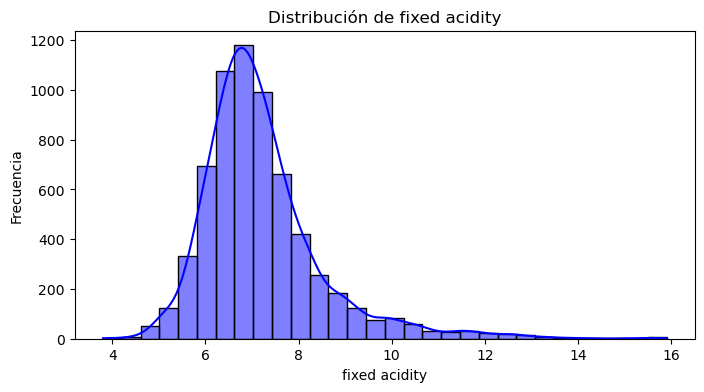

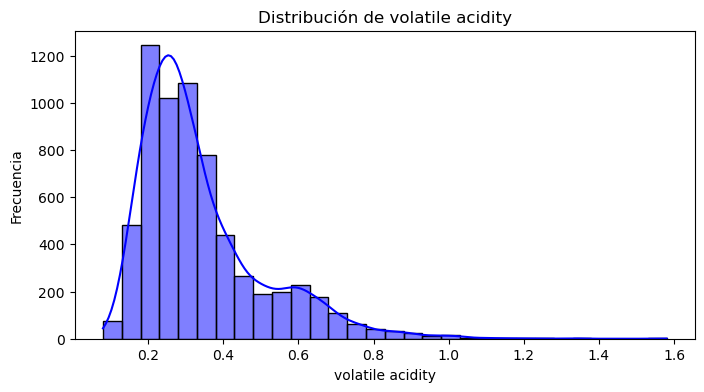

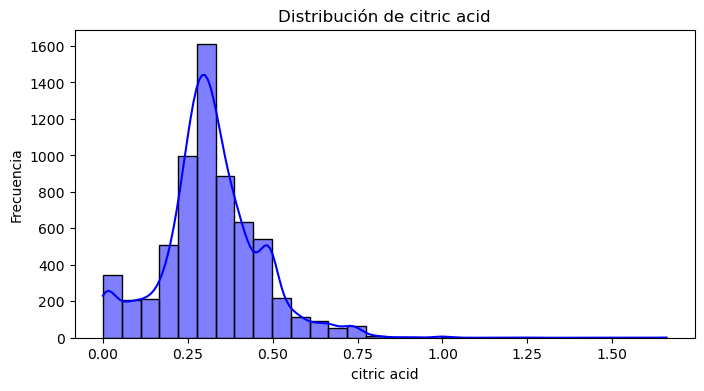

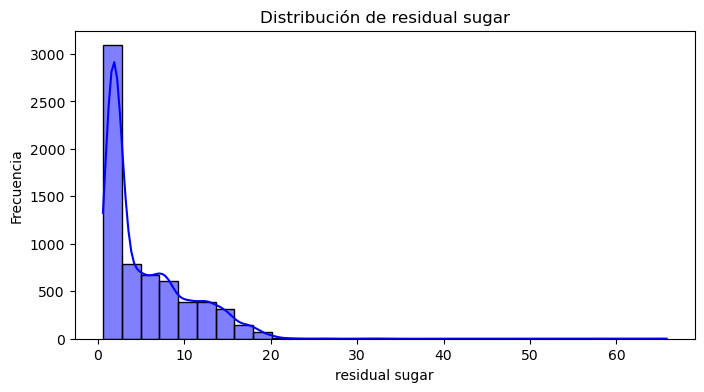

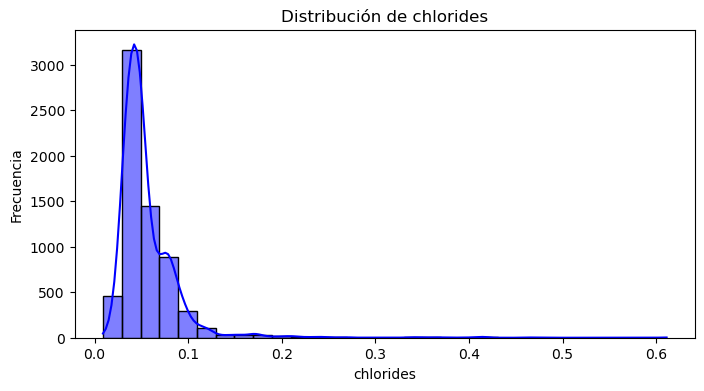

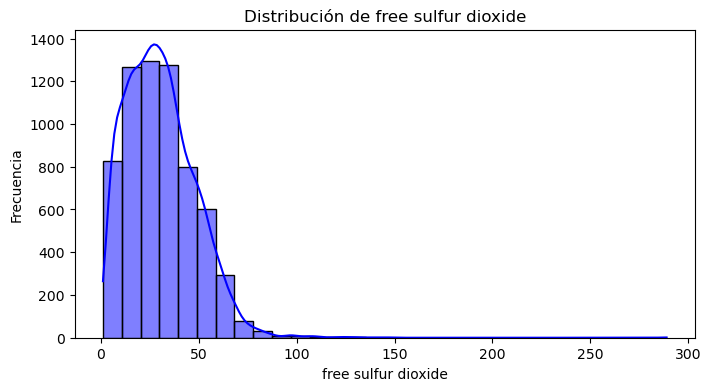

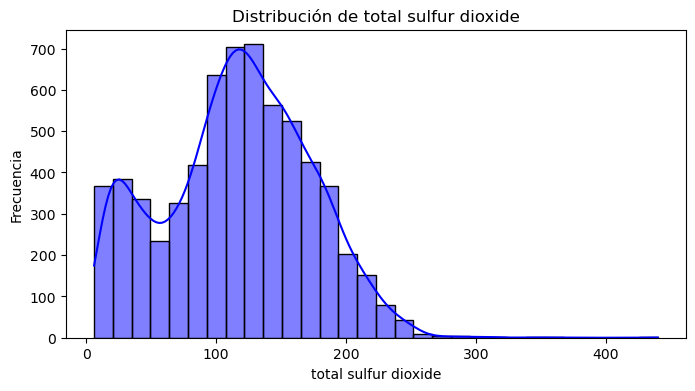

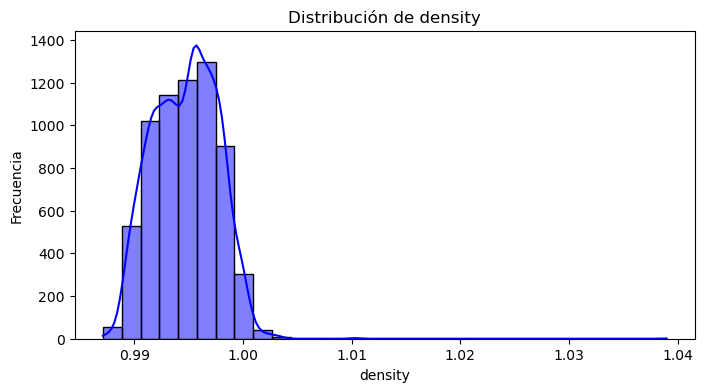

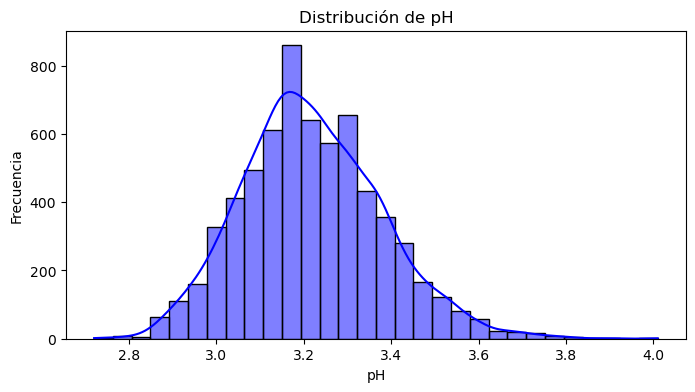

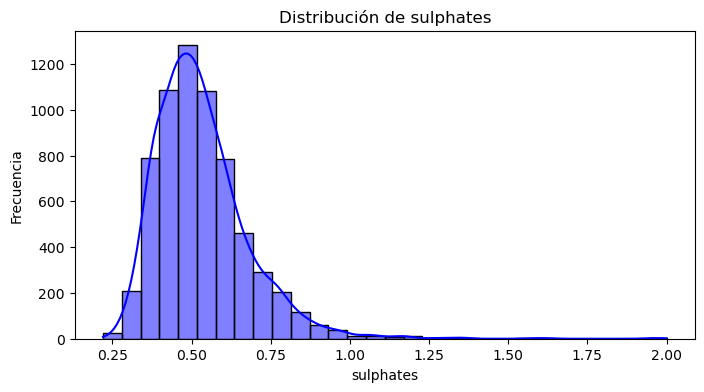

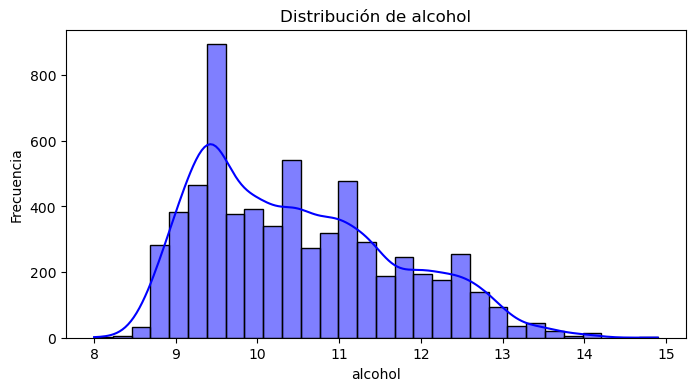

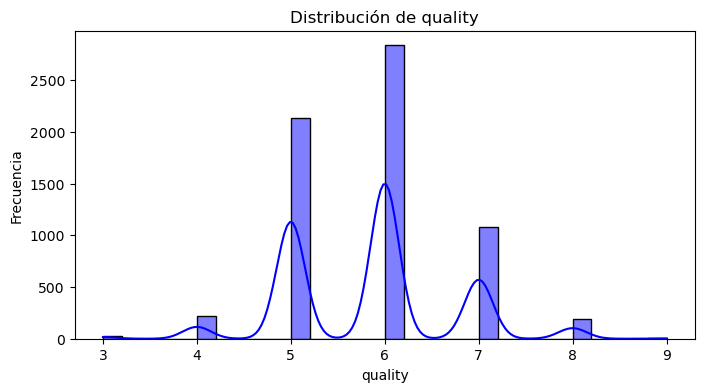

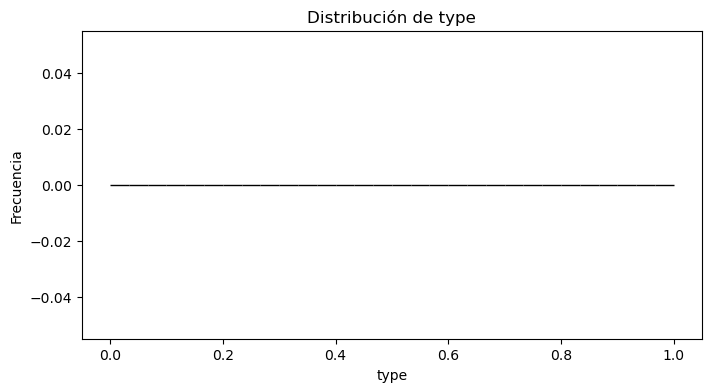

C:\Users\Acer\AppData\Local\Temp\ipykernel_2604\393899813.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


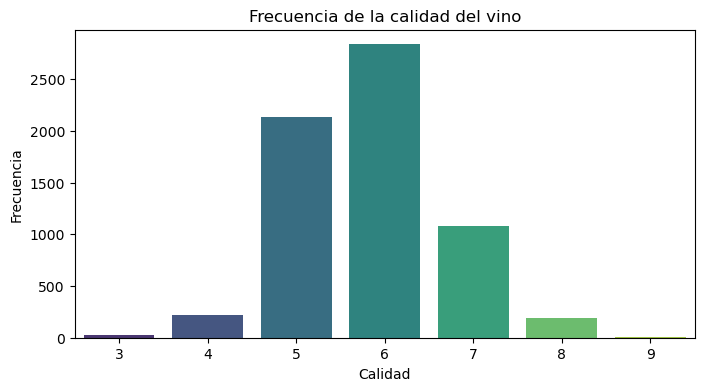

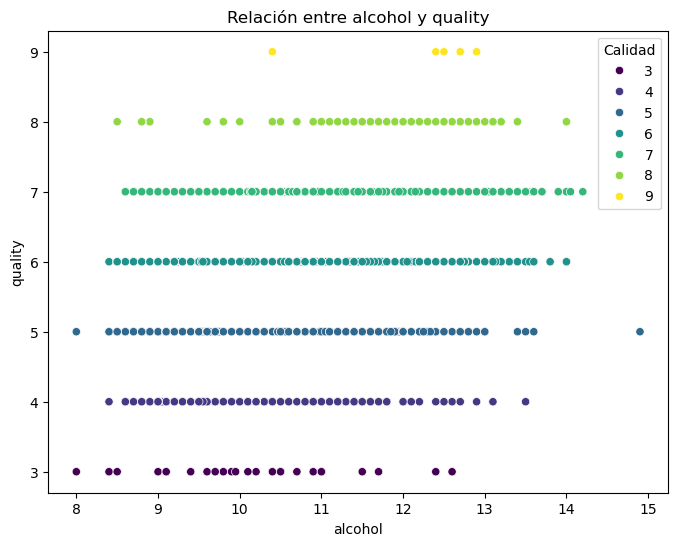

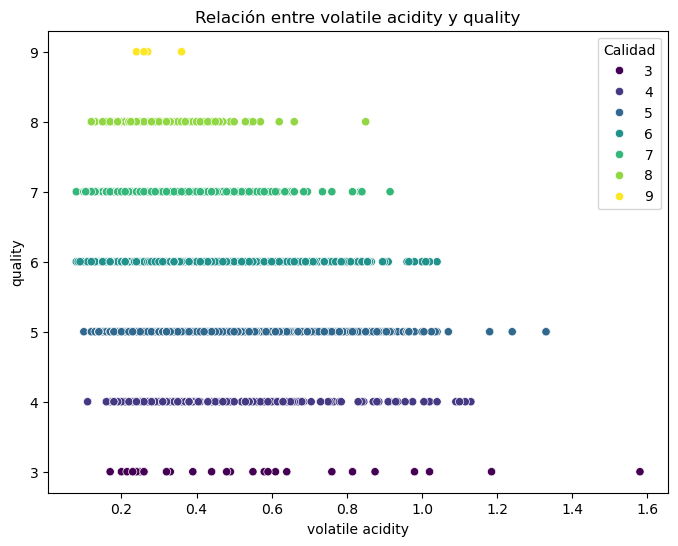

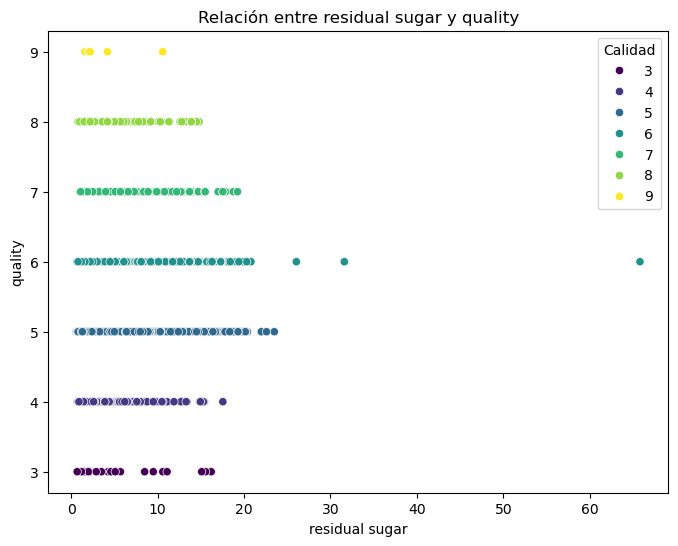

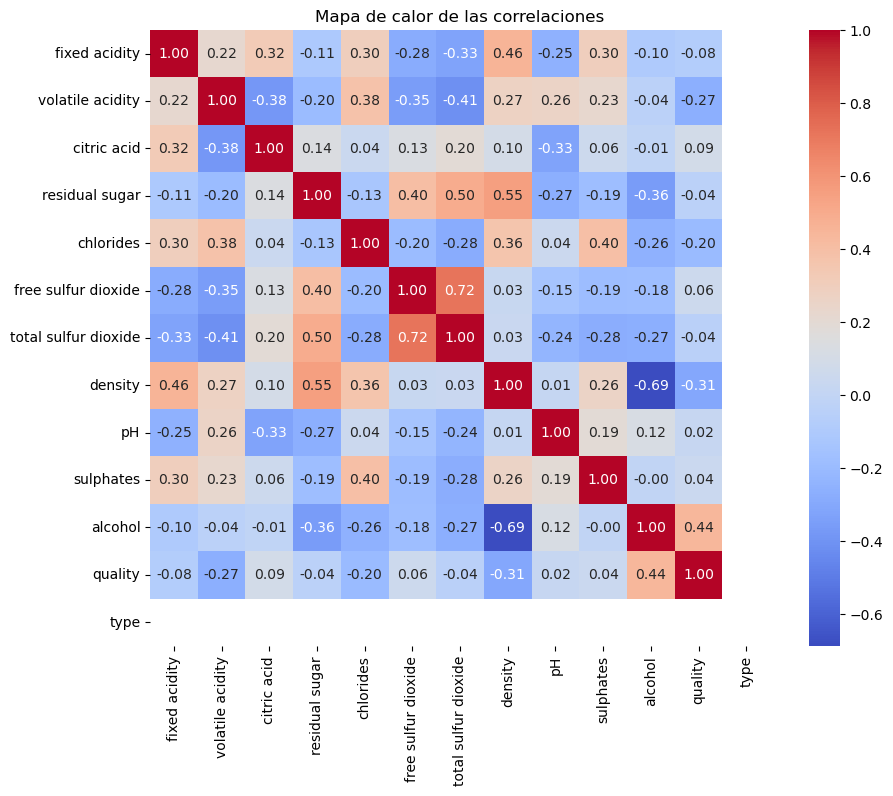

In [ ]:
# Exploración de datos
# ---------------------------------------------
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df.describe())

# Histogramas para cada variable numérica
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

# Gráfico de barras para la variable objetivo 'quality'
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Frecuencia de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

# Diagramas de dispersión para correlaciones clave
correlation_pairs = [('alcohol', 'quality'), ('volatile acidity', 'quality'), ('residual sugar', 'quality')]
for x_var, y_var in correlation_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_var, y=y_var, hue='quality', palette='viridis')
    plt.title(f"Relación entre {x_var} y {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title='Calidad')
    plt.show()

# Mapa de calor
# Eliminar las columnas no numéricas
df_cleaned = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = df_cleaned.corr()

# Visualización del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor de las correlaciones")
plt.show()


[nan]
Evaluación del modelo: Logistic Regression
Accuracy: 0.7338461538461538
Precision: 0.7623762376237624
Recall: 0.8420413122721749
F1-Score: 0.8002309468822171
Matriz de confusión:


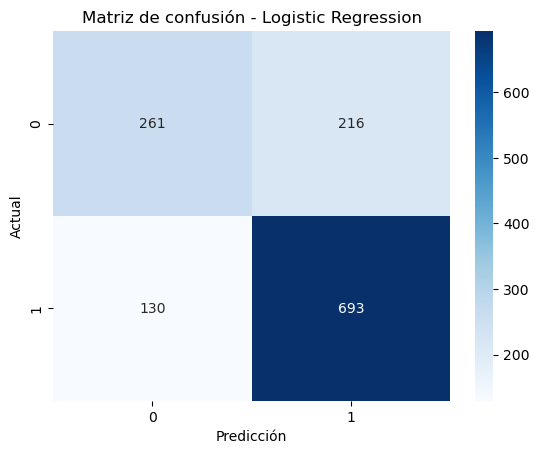

Evaluación del modelo: K-Nearest Neighbors
Accuracy: 0.7423076923076923
Precision: 0.7785388127853882
Recall: 0.8286755771567437
F1-Score: 0.8028251912889935
Matriz de confusión:


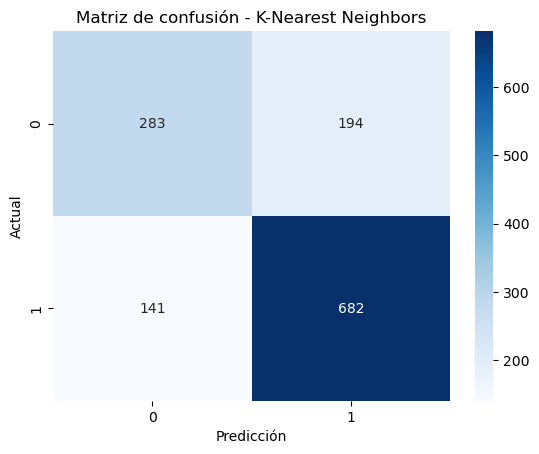

In [49]:
# Preparación para modelado
# ---------------------------------------------
# División entre características (X) y variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality'] > 5  # Clasificación binaria: bueno (>5) o no bueno (<=5)

# Nombre de la columna categórica
col_categorica = 'type'
print(X[col_categorica].unique())
# Crear un LabelEncoder
label_encoder = LabelEncoder()
# Transformar la columna categórica
X[col_categorica] = label_encoder.fit_transform(X[col_categorica])


# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos de clasificación
# ---------------------------------------------
# 1. Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# 2. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
# Evaluación de modelos
# ---------------------------------------------
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluación del modelo: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Matriz de confusión:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {model_name}")
    plt.xlabel("Predicción")
    plt.ylabel("Actual")
    plt.show()

# Evaluar Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluar K-Nearest Neighbors
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

In [47]:
# Análisis comparativo
# ---------------------------------------------
print("Comparación de modelos:")
comparison = pd.DataFrame({
    "Modelo": ["Logistic Regression", "K-Nearest Neighbors"],
    "Accuracy": [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_knn)],
    "Precision": [precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_knn)],
    "Recall": [recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_knn)],
    "F1-Score": [f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_knn)]
})
print(comparison)

Comparación de modelos:
                Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.733846   0.762376  0.842041  0.800231
1  K-Nearest Neighbors  0.742308   0.778539  0.828676  0.802825
